In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import poisson
import datetime as dt
from unidecode import unidecode
from game_log import load_current_line
plt.rcParams['figure.figsize'] = [13, 7]
pd.set_option("display.precision", 3)


In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.min_rows', 20)

In [3]:
opp_stats = pd.read_csv('opponent_stats.csv',index_col=0)
schedule = pd.read_csv('schedule.csv',index_col=0)
KM_vals = pd.read_csv('KM_vals.csv',index_col=0)

today = dt.datetime.today()
year = today.year
month = today.month
day = today.day
today_str = f'{year}_{month}_{day}'


pp_path = f'Lines/pp/pp_{today_str}.csv'
unabated_path = f'Lines/unabated/unabated_{today_str}.csv'

pp_lines = load_current_line(pp_path,'prop_id','time')
unabated = load_current_line(unabated_path,'prop_id','time')

In [4]:
pdata = pd.read_csv('pdata.csv')
pdata['season'] = pdata['date'].apply(lambda x: x.split('-')[0])
data = pd.read_csv('data_2024.csv')
data23 = pd.read_csv('data_2023.csv')
data = pd.concat((pdata,data,data23))
data= data.sort_values(by=['player','date']).reset_index(drop=True)
data.sample(3)

,player,G,date,series,team,H/A,opp,G#,W/L,GS,...,TOV,PF,PTS,GmSc,+/-,pos,KM,season,age,Opp
15936,Keegan Murray,25,2022-12-14,NaN,SAC,0,NaN,NaN,1,1,...,0,1,10,6.1,1.0,SF,15,2023,22-117,TOR
10783,Ivica Zubac,3,2021-05-28,WC1,LAC,0,DAL,3.0,10,1,...,0,1,2,2.0,-2.0,C,15,2021,NaN,NaN
20645,Mikal Bridges,8,2021-06-09,WCS,PHX,1,DEN,2.0,25,1,...,0,2,16,9.8,28.0,SF,15,2021,NaN,NaN


In [5]:
from game_log import get_line

In [6]:
from game_log import GameLog
gl = GameLog(data)

In [7]:
lines = pp_lines.loc[pp_lines.league_id==7].reset_index(drop=True)
p_idx = lines['player'].unique()
p_idx = np.sort(p_idx)
s_idx = lines['stat'].unique()
odd = gl.best_odds(lines,schedule)
odd['Z'] = (odd['expected']-odd['line'])/odd['line']
odd

,player,opp,home,stat,season_avg,mov_avg,expected,line,last_10,season,blend,prob,Z
0,Jamal Murray,DEN,1,PTS+AST,27.8,29.6,29.6,28.5,40.0,42.991,41.495,0.568,0.039
1,Jonas Valanciunas,NOP,1,PTS+TRB,24.0,20.5,20.5,21.5,40.0,57.317,48.659,0.399,-0.047
2,Nikola Vucevic,CHI,1,PTS+AST,20.7,18.4,18.4,18.5,50.0,61.628,55.814,0.475,-0.005
3,DeMar DeRozan,CHI,1,FGA,17.7,17.4,17.4,16.0,50.0,57.692,53.846,0.570,0.087
4,Walker Kessler,UTA,0,PTS+AST,10.1,12.6,12.6,10.5,50.0,42.308,46.154,0.712,0.200
5,Scoot Henderson,POR,1,PTS+AST,12.2,12.6,12.6,16.5,25.0,25.000,25.000,0.137,-0.236
6,Chet Holmgren,OKC,0,PTS,15.0,15.3,15.3,13.5,75.0,75.000,75.000,0.665,0.133
7,P.J. Washington,CHA,1,PTS+AST,18.1,21.1,21.1,17.5,50.0,50.000,50.000,0.779,0.206
8,Daniel Gafford,WAS,1,TRB+AST,6.7,9.1,9.1,7.5,60.0,40.000,50.000,0.688,0.213
9,Tyler Herro,MIA,0,PTS+TRB+AST,26.8,31.2,31.2,32.5,30.0,28.571,29.286,0.397,-0.040


In [8]:
curry = gl.game_log.loc[gl.game_log.player=='Stephen Curry']
curry.loc[curry.season=='2024']['PTS'].mean()

33.5

3P
avg: 4.4


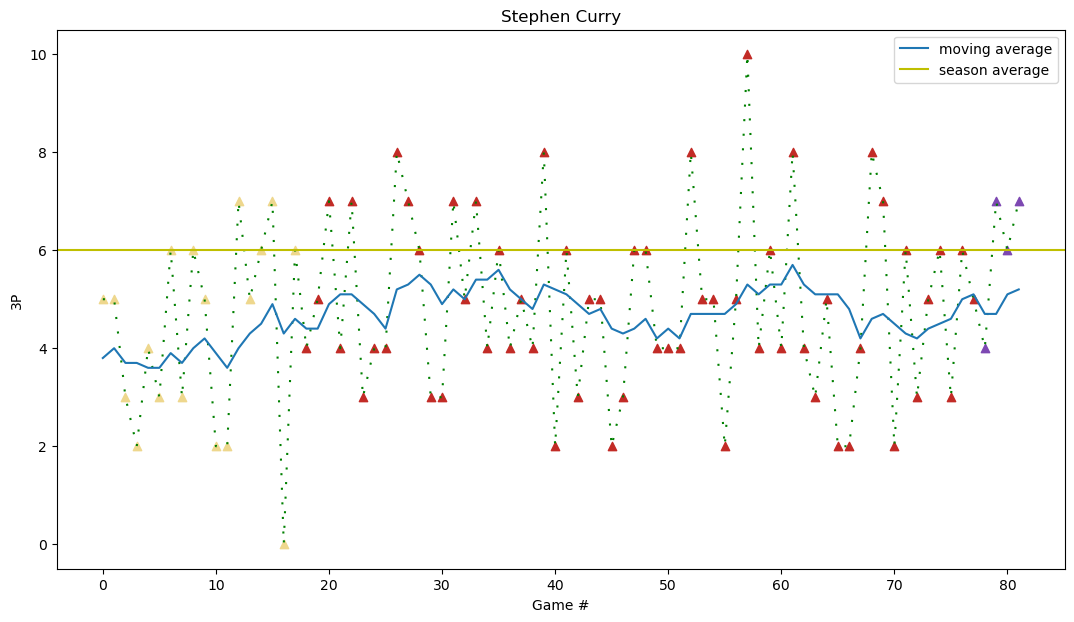

In [9]:
gl.graph_stat('Stephen Curry','3P',10,pp_lines)

In [10]:
%%html
<style>
/*overwrite hard coded write background by vscode for ipywidges */
.cell-output-ipywidget-background {
   background-color: transparent !important;
}

/*set widget foreground text and color of interactive widget to vs dark theme color */
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}
</style>

In [11]:
gl.game_log.loc[gl.game_log.player == 'Devin Vassell']

,player,G,date,series,team,H/A,opp,G#,W/L,GS,...,PF,PTS,GmSc,+/-,pos,KM,season,age,Opp,rest
7409,Devin Vassell,1,2022-10-19,RS,SAS,1,NaN,NaN,-27,1,...,1,11,2.9,-22.0,SG,15,2023,22-057,CHA,5.0
7410,Devin Vassell,2,2022-10-21,RS,SAS,0,NaN,NaN,3,1,...,1,23,20.8,-9.0,SG,15,2023,22-059,IND,2.0
7411,Devin Vassell,3,2022-10-22,RS,SAS,0,NaN,NaN,9,1,...,1,22,18.7,0.0,SG,15,2023,22-060,PHI,1.0
7412,Devin Vassell,4,2022-10-24,RS,SAS,0,NaN,NaN,9,1,...,2,23,17.6,16.0,SG,15,2023,22-062,MIN,2.0
7413,Devin Vassell,5,2022-11-04,RS,SAS,1,NaN,NaN,-7,0,...,2,29,21.8,2.0,SG,15,2023,22-073,LAC,11.0
7414,Devin Vassell,6,2022-11-05,RS,SAS,0,NaN,NaN,-25,0,...,1,20,18.3,-21.0,SG,15,2023,22-074,DEN,1.0
7415,Devin Vassell,7,2022-11-07,RS,SAS,1,NaN,NaN,-6,1,...,0,17,9.8,-4.0,SG,15,2023,22-076,DEN,2.0
7416,Devin Vassell,8,2022-11-09,RS,SAS,1,NaN,NaN,-2,1,...,1,22,15.3,0.0,SG,15,2023,22-078,MEM,2.0
7417,Devin Vassell,9,2022-11-11,RS,SAS,1,NaN,NaN,18,1,...,1,22,14.5,22.0,SG,15,2023,22-080,MIL,2.0
7418,Devin Vassell,10,2022-11-14,RS,SAS,0,NaN,NaN,-37,1,...,1,6,0.7,-32.0,SG,15,2023,22-083,GSW,3.0


In [12]:
from ipywidgets import interact, Dropdown
playerd = Dropdown(options = p_idx)
statd = Dropdown(options = s_idx)

@interact(print(''),player = playerd, stat = statd)
def show_stats(player, stat):
    plt.style.use('dark_background')
    statd.options = lines.loc[lines['player']==player]['stat'] 
    gl.graph_stat(player,stat,10,lines)
    display(odd.loc[odd['player']==player].sort_values(by='prob'))

interactive(children=(Dropdown(description='player', options=('Aaron Gordon', 'Alperen Sengun', 'Andrew Wiggin…

In [13]:
types = Dropdown(options = ['over','under'])
number = Dropdown(options = [10,20])
category = Dropdown(options = np.append('all',s_idx))

@interact(print(' '),types=types, number=number,category=category)
def show_bets(types, number,category):
    pd.set_option('display.max_rows', number)
    pd.set_option('display.min_rows', number)
    if category == 'all':
        table = odd.sort_values(by='prob')
    else:
        table = odd.loc[odd['stat']==category].sort_values(by='prob')
    if types == 'over':
        display(table.loc[table['prob']>0.5].tail(number))
    if types == 'under':
        display(table.loc[table['prob']<0.5].head(number))

interactive(children=(Dropdown(description='types', options=('over', 'under'), value='over'), Dropdown(descrip…

In [14]:
odd

,player,opp,home,stat,season_avg,mov_avg,expected,line,last_10,season,blend,prob,Z
0,Jamal Murray,DEN,1,PTS+AST,27.8,29.6,29.6,28.5,40.0,42.991,41.495,0.568,0.039
1,Jonas Valanciunas,NOP,1,PTS+TRB,24.0,20.5,20.5,21.5,40.0,57.317,48.659,0.399,-0.047
2,Nikola Vucevic,CHI,1,PTS+AST,20.7,18.4,18.4,18.5,50.0,61.628,55.814,0.475,-0.005
3,DeMar DeRozan,CHI,1,FGA,17.7,17.4,17.4,16.0,50.0,57.692,53.846,0.570,0.087
4,Walker Kessler,UTA,0,PTS+AST,10.1,12.6,12.6,10.5,50.0,42.308,46.154,0.712,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,Herbert Jones,NOP,1,PTS+TRB,13.9,14.2,14.2,14.5,60.0,40.580,50.290,0.451,-0.021
550,Luka Doncic,DAL,0,TRB+AST,16.8,18.2,18.2,18.5,30.0,27.536,28.768,0.456,-0.016
551,Gordon Hayward,CHA,1,TRB,4.4,4.6,4.6,4.0,40.0,47.170,43.585,0.487,0.150
552,Andrew Wiggins,GSW,0,PTS+AST,18.6,14.8,14.8,15.5,50.0,65.278,57.639,0.411,-0.045


In [15]:
odd.to_csv('ontherun.csv')

In [16]:
def check(lines):
    val = []
    everything = []
    err = 0
    date = lines['Date'][0]
    avail = data.loc[data['Date']< date]
    for i in range(len(lines)):
        if i%10 == 0:
            print(i)
        player = lines['Player'][i]
        date = lines['Date'][i]
        cat = lines['Stat'][i]
        line = lines['Line'][i]
        opp = lines['Team'][i]
        game  = get_game(player,date)
        expect = adjust(player,cat,opp,stats=avail)
        
        if game.empty:
            print('err',player)
            err += 1
        else:
            x = get_stat(player,cat,game)
            pred_diff = expect-line
            diff_real = x-line
            if np.sign(pred_diff) == np.sign(diff_real):
                val=1
            else:
                val=0
            season = float(print_prob(player,line,cat,stats=avail,prnt=False))
            l_10 = float(print_prob(player,line,cat,games=10,stats=avail,prnt=False))
            
            everything.append((player,opp,cat,expect,line,x[0],pred_diff,diff_real[0],val,l_10,season))
            
    x = np.array(everything)
    df = pd.DataFrame(x,columns=['Player','opp','Stat','pred','line','actual','pred_diff','diff_real','Win','l_10','season'])
    numeric = ['pred','line','actual','pred_diff','diff_real','Win','l_10','season']
    df[numeric]=df[numeric].astype(float)
    df['Prob']= 1- poisson.cdf(mu=df['pred'],k=df['line'])
    return df

In [17]:
pd.set_option('display.precision', 2)

df = check(pp_yesterday)
df

NameError: name 'pp_yesterday' is not defined

In [ ]:
end= df

In [ ]:
def results(final):
    bets = len(final)
    over_actual = len(final.loc[final['diff_real']>0])
    print(over_actual,bets)
    o_per = over_actual/bets
    under_actual = len(final.loc[final['diff_real']<0])
    u_per = under_actual/bets
    over_pred = len(final.loc[final['pred_diff']>0])
    o_wins = final.loc[final['pred_diff']>0]['Win'].sum()
    
    under_pred = len(final.loc[final['pred_diff']<0])
    u_wins = final.loc[final['pred_diff']<0]['Win'].sum()
    
    print(f'actual over:{over_actual}/{len(final)}, {100*o_per:.0f}%')
    print(f'actual under:{under_actual}/{len(final)}, {100*u_per:.0f}%')
    print('predicted over results',o_wins,over_pred, f'{o_wins/over_pred:.0%}')
    print('predicted under results:',u_wins,under_pred, f'{u_wins/under_pred:.0%}')
    print('overall results:',f'{(o_wins+u_wins)/bets:.0%}')
    return ((o_wins+u_wins)/bets)

In [ ]:
poiss_mid = end.loc[end['Prob']> 0.25]
poiss_low = poiss_mid.loc[poiss_mid['Prob']< 0.75]
results(poiss_mid)

In [ ]:
poiss_low = end.loc[end['Prob']< 0.3]
#poiss_low = poiss_low.loc[poiss_low['season']<0.5]
results(poiss_low)

In [ ]:
poiss_high = end.loc[end['Prob']> 0.7]
#poiss_high = poiss_high.loc[poiss_high['season']>0.5]
results(poiss_high)

In [ ]:
results(pd.concat((poiss_low,poiss_high)))

In [ ]:
parlay = pd.read_csv('parlaylines4_6')
parlay

In [ ]:
new_df = pd.merge(pp_today, dog_today,  how='left', left_on=['Player','Stat','Date'], right_on = ['Player','Stat','Date'],
                 suffixes=['_pp','_dog']) 
new_df

In [ ]:
new_df= new_df.dropna()
line_diff = new_df.loc[new_df['Line_pp'] != new_df['Line_dog']]
line_diff = line_diff.reset_index(drop=True)
line_diff

In [ ]:
new_df

In [ ]:
def best_diff_odds(lines):
    date = lines['Date'].iloc[0]
    home_teams = schedule.loc[schedule['Date']==date]['Home'].values
    player_lines = lines.iloc[:,0]
    avail = data.loc[data['Date']< date]
    player_idx = data['Player'].unique()
    vals = []
    for i in range(len(player_lines)):
        player = lines.iloc[i,0]
        
        if player in player_idx:
            cat = lines.iloc[i,3]
            opp = lines.iloc[i,1]
            if opp in home_teams:
                home = 0
            else:
                home = 1
            mov = dynamic(player, cat ,5,avail)
            series = np.array(get_stat(player,cat))
            line_pp = lines['Line_pp'][i]
            line_dog = lines['Line_dog'][i]
            season = print_prob(player,line_pp,cat,stats=avail,prnt=False)
            l_10 = print_prob(player,line_pp,cat,games=10,stats=avail,prnt=False)
            
            avg = np.mean(series)
            mov_avg = dynamic(player,cat)[-1]
            expected = adjust(player,cat,opp,avail)
            vals.append([player,opp,home,cat,round(avg,1),round(mov_avg,1),round(expected,1),line_pp,line_dog,l_10,season])
          
    odd = pd.DataFrame(vals,columns=['Player','Opp','Home','Stat','Season_avg','mov_avg','expected','line_pp','line_dog','Last_10','Season'])
    odd['blend'] = odd[['Last_10', 'Season']].mean(axis=1) 
    odd['Prob']= 1- poisson.cdf(mu=odd['expected'],k=odd['line_pp'])
            
    return odd

In [ ]:
pd.set_option('display.max_rows', 25)
pd.set_option('display.min_rows', 25)
diff = best_diff_odds(line_diff)

In [ ]:
diff['dog_Prob'] = 1- poisson.cdf(mu=diff['expected'],k=diff['line_dog'])
diff['Prob_diff'] = diff['Prob']-diff['dog_Prob']

In [ ]:
diff.sort_values(by='Prob_diff')

In [ ]:
dog_today.head(2)

In [ ]:
pp_under = diff.loc[(diff['line_pp'] > diff['line_dog']) & (diff['Prob'] < 0.5)]
pp_under.sort_values(by='Prob')

In [ ]:
pp_over = diff.loc[(diff['line_pp'] < diff['line_dog']) & (diff['Prob'] > 0.5)]
pp_over.sort_values(by='Prob')

In [ ]:
dog_under = diff.loc[(diff['line_dog'] > diff['line_pp']) & (diff['Prob'] < 0.5)]
dog_under.sort_values(by='dog_Prob')

In [ ]:
dog_over = diff.loc[(diff['line_dog'] < diff['line_pp']) & (diff['Prob'] > 0.5)]
dog_over.sort_values(by='dog_Prob')

In [ ]:
unabated = pd.read_csv('Lines/unabated', index_col=0)
unabated = unabated.sort_values(by='Prob')
fullpdf = pd.read_csv('Lines/fullpdf', index_col=0)
fullpdf = fullpdf.reset_index(drop=True)

In [ ]:
jak = fullpdf.loc[fullpdf.Player=='Jakob Poeltl']
jak.loc[jak.Stat=='TRB']

In [ ]:
odd.head(2)

In [ ]:
odd['market'] = None

In [ ]:
for i in range(len(odd)):
#    if i % 50 == 0:
#        print(i,'/',len(fullpdf))
    p = odd.Player[i]
    line = odd.line[i]
    stat = odd.Stat[i]
    find = fullpdf.loc[(fullpdf.Player == p)]
    find = find.loc[find.Stat==stat]
    find = find.loc[find.Line==line]
    if len(find) != 0:
        odd.market[i] = find.Prob.mean()

In [ ]:
test = odd.dropna()
test = test.sort_values(by='market')
test

In [ ]:
test.loc[test.Stat=='TRB']

In [ ]:
correlation = pd.read_csv('correlation')
correlation.head(5)

In [ ]:
sorted_odds = odd.sort_values(by='Prob').reset_index(drop=True)
pts = sorted_odds.loc[sorted_odds.Stat=='PTS']
pts

In [ ]:
pts.head(4)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pts = sorted_odds.loc[sorted_odds.Stat=='PTS']
pts = pts.loc[pts.Prob >0.6].reset_index(drop=True)
players = pts.Player.unique()
for i in range(len(pts)): 
    p = pts.Player[i]
    guycorr = correlation.loc[correlation.P1 == p]
    guycorr = guycorr.loc[guycorr['P2'].isin(players)]
    guycorr = guycorr.loc[abs(guycorr.Corr) > 0.15]
    if guycorr.empty == False:
        print(p)
        display(guycorr)
        mainline = pts.iloc[i]
        for j in guycorr.P2:
            corrguy = pts.loc[pts.Player==j]
            mainline = pd.concat((corrguy.T,mainline.T),axis=1).T
        display(mainline)

In [ ]:
pts

In [ ]:
odd.to_csv('ontherun.csv')